Data & AI Track: 
Use the US Traffic 2015 Dataset (https://www.kaggle.com/jboysen/us-traffic-2015), to visualise the traffic patterns.

In [1]:
# Import all the required modules
import numpy as np
from numpy import log
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.transforms
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from statsmodels.tsa.exponential_smoothing.ets import ETSResults
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import adfuller
import pmdarima as pm

In [2]:
# Read the data into pandas dataframe
# Download the "dot_traffic_2015.txt" & "dot_traffic_stations_2015.txt" files from https://www.kaggle.com/jboysen/us-traffic-2015.
traffic = pd.read_csv("dot_traffic_2015.txt")
traffic_stations = pd.read_csv("dot_traffic_stations_2015.txt")

In [3]:
# Check the contents & metadata of traffic
print(traffic.shape)
print(traffic.info())
traffic.describe()

(7140391, 38)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7140391 entries, 0 to 7140390
Data columns (total 38 columns):
 #   Column                                     Dtype  
---  ------                                     -----  
 0   date                                       object 
 1   day_of_data                                int64  
 2   day_of_week                                int64  
 3   direction_of_travel                        int64  
 4   direction_of_travel_name                   object 
 5   fips_state_code                            int64  
 6   functional_classification                  object 
 7   functional_classification_name             object 
 8   lane_of_travel                             int64  
 9   month_of_data                              int64  
 10  record_type                                int64  
 11  restrictions                               float64
 12  station_id                                 object 
 13  traffic_volume_counted_after

,day_of_data,day_of_week,direction_of_travel,fips_state_code,lane_of_travel,month_of_data,record_type,restrictions,traffic_volume_counted_after_0000_to_0100,traffic_volume_counted_after_0100_to_0200,...,traffic_volume_counted_after_1500_to_1600,traffic_volume_counted_after_1600_to_1700,traffic_volume_counted_after_1700_to_1800,traffic_volume_counted_after_1800_to_1900,traffic_volume_counted_after_1900_to_2000,traffic_volume_counted_after_2000_to_2100,traffic_volume_counted_after_2100_to_2200,traffic_volume_counted_after_2200_to_2300,traffic_volume_counted_after_2300_to_2400,year_of_data
count,7.140391e+06,7.140391e+06,7.140391e+06,7.140391e+06,7.140391e+06,7.140391e+06,7140391.0,0.0,7.140391e+06,7.140391e+06,...,7.140391e+06,7.140391e+06,7.140391e+06,7.140391e+06,7.140391e+06,7.140391e+06,7.140391e+06,7.140391e+06,7.140391e+06,7140391.0
mean,1.572650e+01,4.013872e+00,3.883486e+00,2.966967e+01,1.291672e+00,6.520263e+00,3.0,NaN,1.145878e+02,7.874558e+01,...,7.497160e+02,7.770437e+02,7.565536e+02,6.173322e+02,4.793756e+02,3.906426e+02,3.274747e+02,2.534447e+02,1.798298e+02,15.0
std,8.769343e+00,1.997511e+00,2.286816e+00,1.670612e+01,1.080419e+00,3.455234e+00,0.0,NaN,2.818492e+02,2.202875e+02,...,1.143318e+03,1.173933e+03,1.172116e+03,1.061545e+03,9.203711e+02,8.290271e+02,7.989146e+02,7.284074e+02,6.901713e+02,0.0
min,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,3.0,NaN,-1.000000e+00,-1.000000e+00,...,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,15.0
25%,8.000000e+00,2.000000e+00,1.000000e+00,1.300000e+01,1.000000e+00,4.000000e+00,3.0,NaN,1.300000e+01,8.000000e+00,...,1.830000e+02,1.860000e+02,1.740000e+02,1.310000e+02,9.500000e+01,7.200000e+01,5.400000e+01,3.600000e+01,2.200000e+01,15.0
50%,1.600000e+01,4.000000e+00,4.000000e+00,3.000000e+01,1.000000e+00,7.000000e+00,3.0,NaN,4.200000e+01,2.700000e+01,...,4.380000e+02,4.520000e+02,4.320000e+02,3.370000e+02,2.520000e+02,1.980000e+02,1.550000e+02,1.090000e+02,7.000000e+01,15.0
75%,2.300000e+01,6.000000e+00,5.000000e+00,4.400000e+01,2.000000e+00,1.000000e+01,3.0,NaN,1.260000e+02,8.500000e+01,...,8.910000e+02,9.340000e+02,9.070000e+02,7.220000e+02,5.510000e+02,4.470000e+02,3.670000e+02,2.780000e+02,1.930000e+02,15.0
max,3.100000e+01,7.000000e+00,9.000000e+00,5.600000e+01,9.000000e+00,1.200000e+01,3.0,NaN,9.999900e+04,8.074100e+04,...,9.999900e+04,9.999900e+04,9.999900e+04,9.999900e+04,9.999900e+04,9.999900e+04,9.999900e+04,9.999900e+04,9.999900e+04,15.0


In [4]:
# Check the contents & metadata of traffic_stations
print(traffic_stations.shape)
print(traffic_stations.info())
traffic_stations.describe()

(28466, 55)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28466 entries, 0 to 28465
Data columns (total 55 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   algorithm_of_vehicle_classification               18576 non-null  object 
 1   algorithm_of_vehicle_classification_name          17335 non-null  object 
 2   calibration_of_weighing_system                    8165 non-null   object 
 3   calibration_of_weighing_system_name               6681 non-null   object 
 4   classification_system_for_vehicle_classification  28466 non-null  int64  
 5   concurrent_route_signing                          28466 non-null  int64  
 6   concurrent_signed_route_number                    13592 non-null  object 
 7   direction_of_travel                               28466 non-null  int64  
 8   direction_of_travel_name                          28466 non-null  object 
 9   fips_

,classification_system_for_vehicle_classification,concurrent_route_signing,direction_of_travel,fips_county_code,fips_state_code,lane_of_travel,latitude,longitude,lrs_location_point,method_of_data_retrieval,...,method_of_truck_weighing,method_of_vehicle_classification,number_of_lanes_in_direction_indicated,number_of_lanes_monitored_for_traffic_volume,number_of_lanes_monitored_for_truck_weight,number_of_lanes_monitored_for_vehicle_class,posted_route_signing,year_of_data,year_station_discontinued,year_station_established
count,28466.000000,28466.000000,28466.000000,28466.000000,28466.000000,28466.000000,28465.000000,28465.000000,19467.000000,28466.000000,...,28466.000000,28466.000000,28466.000000,28466.000000,28466.000000,28466.000000,28466.000000,28466.0,28466.000000,28466.000000
mean,12.804363,0.867561,3.841530,70.112731,27.532846,1.427036,38.141075,100.191299,79043.487440,1.927106,...,0.955983,1.806717,2.505937,2.547214,0.589651,1.583644,1.855161,15.0,1.063233,53.212323
std,3.375080,1.371240,2.305921,87.981999,16.907782,1.219102,7.423830,77.900719,148969.365761,0.313844,...,1.924756,1.458538,1.343976,1.398037,1.162620,1.607218,1.158747,0.0,9.060652,40.400920
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.0,0.000000,0.000000
25%,13.000000,0.000000,1.000000,19.000000,12.000000,1.000000,34.053637,80.576670,2871.000000,2.000000,...,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,1.000000,15.0,0.000000,8.000000
50%,13.000000,0.000000,4.000000,49.000000,27.000000,1.000000,39.302861,88.209350,15305.000000,2.000000,...,0.000000,3.000000,2.000000,2.000000,0.000000,2.000000,2.000000,15.0,0.000000,67.000000
75%,15.000000,2.000000,5.000000,95.000000,41.000000,2.000000,42.252370,111.937942,71200.000000,2.000000,...,0.000000,3.000000,3.000000,3.000000,1.000000,2.000000,3.000000,15.0,0.000000,94.000000
max,15.000000,9.000000,9.000000,999.000000,56.000000,9.000000,99.900010,993.387110,999999.000000,2.000000,...,5.000000,4.000000,9.000000,9.000000,8.000000,9.000000,9.000000,15.0,99.000000,99.000000


In [5]:
# drop columns which are not essential
traffic = traffic.drop(columns=['functional_classification', 'functional_classification_name', 'lane_of_travel', 'record_type', 'restrictions'], axis = 1)

Data Exploration & Analysis
Analyse data by Hour, Date, Day of the Week and Month

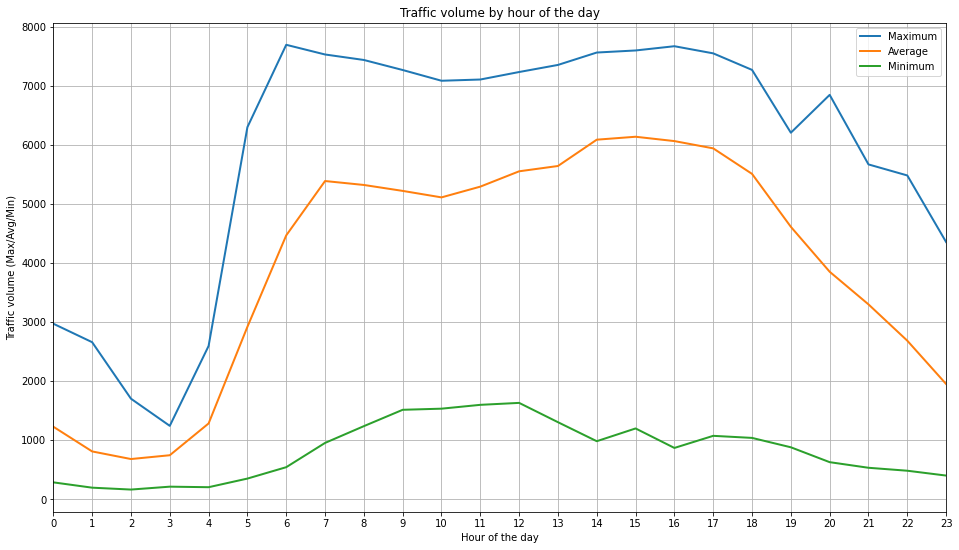

In [6]:
# Filter the data by a random station id, in this case 0P0032
trafficOneStation = traffic[(traffic.station_id == "0P0032")]

# Get the max/avg/min hourly data for this station 
hourly_traffic_max = trafficOneStation.loc[:,"traffic_volume_counted_after_0000_to_0100":"traffic_volume_counted_after_2300_to_2400"].max()
hourly_traffic_avg = trafficOneStation.loc[:,"traffic_volume_counted_after_0000_to_0100":"traffic_volume_counted_after_2300_to_2400"].mean()
hourly_traffic_min = trafficOneStation.loc[:,"traffic_volume_counted_after_0000_to_0100":"traffic_volume_counted_after_2300_to_2400"].min()

# Prepare the plot area
figHourly = plt.figure(1,figsize=(16, 9))
axHourly = figHourly.gca()
axHourly.set_xticks(np.arange(0, 25, 1))  # 0 to 25 ticks one the x-axis
plt.xlim((0,23))                    # limit to 24 ticks for 24 hours
plt.title("Traffic volume by hour of the day")
plt.xlabel("Hour of the day")
plt.ylabel("Traffic volume (Max/Avg/Min)")

# Plot the max/avg/min hourly data
plt.plot(range(0,24,1), hourly_traffic_max, label='Maximum', linewidth=2, aa=True)
plt.plot(range(0,24,1), hourly_traffic_avg, label='Average', linewidth=2, aa=True)
plt.plot(range(0,24,1), hourly_traffic_min, label='Minimum', linewidth=2, aa=True)

plt.legend()
plt.grid()
plt.show()

From the above hourly plot, the traffic volume is lowest at night (between around 9 PM to 5 AM), but peaks at morning and evening time.

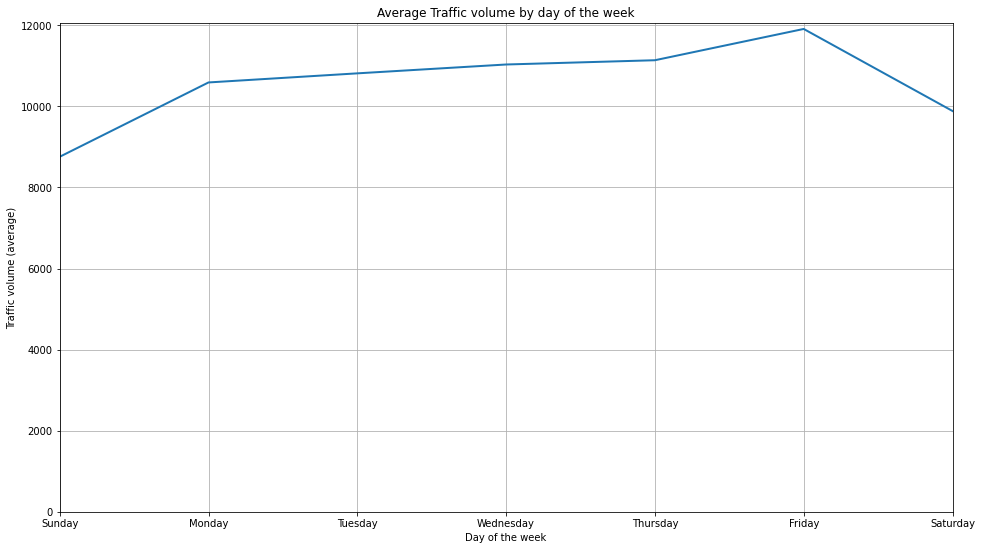

In [7]:
# Create a weekly traffic dataframe by adding the hourly traffic to one column 'Weekly Traffic'
weekly_traffic = traffic
weekly_traffic.loc[:,'Weekly Traffic'] = weekly_traffic.loc[:,"traffic_volume_counted_after_0000_to_0100":"traffic_volume_counted_after_2300_to_2400"].sum(axis=1)

# Get the average traffic volume by day of the week
weekly_traffic_avg = weekly_traffic[["day_of_week","Weekly Traffic"]].groupby("day_of_week").mean()

# Prepare the plot area
figWeekly = plt.figure(1,figsize=(16, 9))
axWeekly = figWeekly.gca()
plt.title("Average Traffic volume by day of the week")
plt.xlabel("Day of the week")
plt.ylabel("Traffic volume (average)")

# Plot the weekly traffic data
plt.plot(weekly_traffic_avg, linewidth=2, aa=True)
axpWeekly = plt.gca()
axpWeekly.xaxis.set_ticks(weekly_traffic_avg.index.to_list())   # Set ticks from the day of the week number
axpWeekly.axes.xaxis.set_ticklabels(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.xlim(weekly_traffic_avg.index[0],len(weekly_traffic_avg.index))
plt.ylim((0,axpWeekly.get_ylim()[1]))

plt.grid()
plt.show()

From the above Day of the week plot, the average traffic volume is lowest on weekends, but rises during weekdays.

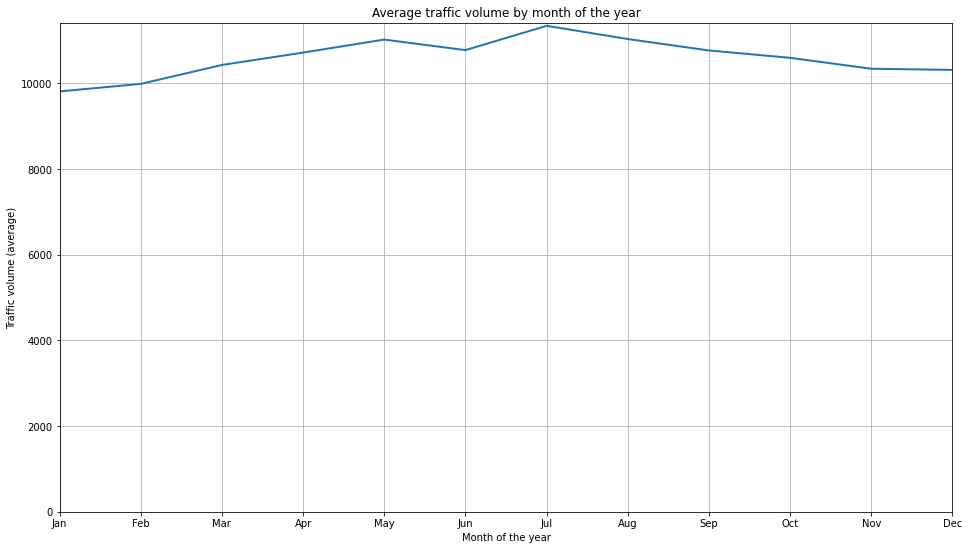

In [8]:
# Create a monthly traffic dataframe by adding the hourly traffic to one column 'Monthly Traffic'
monthly_traffic = traffic
monthly_traffic.loc[:,'Monthly Traffic'] = monthly_traffic.loc[:,"traffic_volume_counted_after_0000_to_0100":"traffic_volume_counted_after_2300_to_2400"].sum(axis=1)

# Get the average the traffic volume by month
monthly_traffic_avg = monthly_traffic[["month_of_data","Monthly Traffic"]].groupby("month_of_data").mean()

# Prepare the plot area
figMonthly = plt.figure(1,figsize=(16, 9))
axMonthly = figMonthly.gca()
plt.title("Average traffic volume by month of the year")
plt.xlabel("Month of the year")
plt.ylabel("Traffic volume (average)")

# Plot the monthly traffic data
plt.plot(monthly_traffic_avg, linewidth=2, aa=True)
axpMonthly = plt.gca()
axpMonthly.xaxis.set_ticks(monthly_traffic_avg.index.to_list())
axpMonthly.axes.xaxis.set_ticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlim(monthly_traffic_avg.index[0],len(monthly_traffic_avg.index))
plt.ylim((0,axpMonthly.get_ylim()[1]))

plt.grid()
plt.show()

From the above monthly plot, the average traffic volume is lowest in December-January period, but rises mid-year with peak in July.

Use external data to add new features
The County & State FIPS Code data is available from United States Department of Agriculture website
https://www.nrcs.usda.gov/wps/portal/nrcs/detail/national/technical/nra/nri/results/?cid=nrcs143_013696
https://www.nrcs.usda.gov/wps/portal/nrcs/detail/national/technical/nra/nri/results/?cid=nrcs143_013697

In [9]:
# Import county and state information
county_fip = pd.read_csv("County_FIPS_Codes.csv")
state_fip = pd.read_csv("State_FIPS_Codes.csv")
county_fip.info()
state_fip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3232 entries, 0 to 3231
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   FIPS        3232 non-null   int64 
 1   CountyName  3232 non-null   object
 2   StateCode   3232 non-null   object
dtypes: int64(1), object(2)
memory usage: 75.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   FIPS       55 non-null     int64 
 1   StateCode  55 non-null     object
 2   StateName  55 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.4+ KB


In [10]:
# Merge the county and state dataframe to get fip codes which can be joined with traffic data
state_county_fip = pd.merge(county_fip, state_fip, how="left", on="StateCode", suffixes=("_County", "_State"))

# County doesnt contain Washington DC so need to use left join and add missing data
replaceFIPS_State = str(state_county_fip[(state_county_fip.StateCode == "DC")]['FIPS_County'].values)[1:3]
replaceStateName = state_county_fip[(state_county_fip.StateCode == "DC")]['CountyName'].values + ' ' + state_county_fip[(state_county_fip.StateCode == "DC")]['StateCode'].values

state_county_fip['FIPS_State'] = state_county_fip['FIPS_State'].fillna(int(replaceFIPS_State))
state_county_fip['StateName'] = state_county_fip['StateName'].fillna(replaceStateName[0])

# Keep unique combination of State Abbr, State Name and FIP Code
state_county_fip = state_county_fip[state_county_fip.columns[~state_county_fip.columns.isin(['FIPS_County', 'CountyName'])]]
state_county_fip = state_county_fip.drop_duplicates(['StateCode', 'FIPS_State', 'StateName'])

# Create a states traffic dataframe by adding the hourly traffic to one column 'Avg Traffic' and then average it over the grouped state code
states_traffic = traffic
states_traffic.loc[:,'Avg Traffic'] = states_traffic.loc[:,"traffic_volume_counted_after_0000_to_0100":"traffic_volume_counted_after_2300_to_2400"].sum(axis=1)
states_traffic_avg = states_traffic[["fips_state_code","Avg Traffic"]].groupby("fips_state_code").mean()

# State code is index, convert it to column and rename
states_traffic_avg.reset_index(inplace=True) 
states_traffic_avg.columns = ['FIPS_State', 'Avg Traffic']

# Convert FIPS code to int in both dataframes (traffic & state) to join them
states_traffic_avg.FIPS_State.astype(int)
state_county_fip.FIPS_State.astype(int)
statesName_traffic = pd.merge(states_traffic_avg, state_county_fip, how="left", on="FIPS_State")

# Sort traffic values from highest to lowest for states
statesName_traffic = statesName_traffic.sort_values(['Avg Traffic'], ascending=False, inplace=False)
statesName_traffic = statesName_traffic.reset_index(inplace=False)
statesName_traffic.head()

,index,FIPS_State,Avg Traffic,StateCode,StateName
0,2,4,41975.350252,AZ,Arizona
1,40,45,35202.631662,SC,South Carolina
2,4,6,34912.276425,CA,California
3,20,24,24873.391630,MD,Maryland
4,39,44,23741.895243,RI,Rhode Island


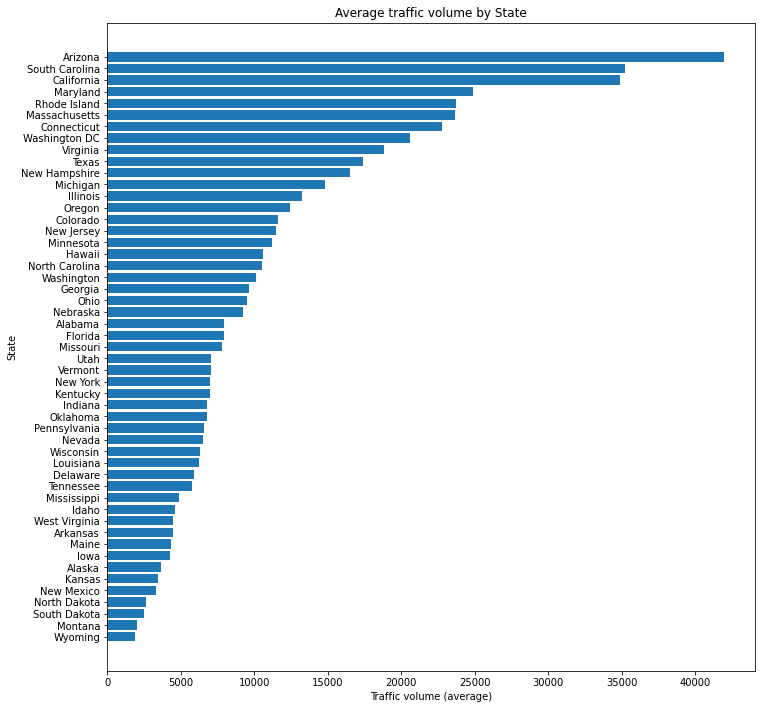

In [11]:
# Create bar chart for traffic by state

# Prepare the plot area
figState = plt.figure(1,figsize=(9, 9))
axState = figState.gca()
axState = figState.add_axes([0,0,1,1])

# Set the axis for state name and traffic volume
y_pos = np.arange(len(statesName_traffic['StateName']))     # statename on vertical axis
axState.barh(y_pos, statesName_traffic['Avg Traffic'])          # traffic values for length of the bars
axState.set_yticks(y_pos)
axState.set_yticklabels(statesName_traffic['StateName'])
axState.invert_yaxis()                                          # display from highest to lowest
axState.set_title("Average traffic volume by State")
axState.set_ylabel("State")
axState.set_xlabel("Traffic volume (average)")

plt.show()

From the above chart, the state of Arizona has the highest average traffic whereas Wyoming has the lowest.

Use external data to add new features
The US holidays data is available from Kaggle website
https://www.kaggle.com/donnetew/us-holiday-dates-2004-2021
This list of holidays includes 18 years of US Holidays dated between January 1st, 2004 and December 31st, 2021. Each record has Date, Holiday, Weekday, Month, Day and Year.

In [12]:
# Import US holidays information
holidays = pd.read_csv("US Holiday Dates (2004-2021).csv")

# Filter only 2015 dates as our source data contains only 2015 data
holidays = holidays[(holidays.Year == 2015)]

# Set date as index, remove other columns
holidays.set_index("Date",inplace=True)
holidays.sort_index(inplace=True)
holidays.drop(columns=["WeekDay", "Month", "Day", "Year"], inplace=True)
holidays

,Holiday
Date,
2015-01-01,New Year's Day
2015-01-19,"Martin Luther King, Jr. Day"
2015-02-14,Valentine’s Day
2015-02-16,Washington's Birthday
2015-04-05,Western Easter
2015-04-12,Eastern Easter
2015-05-25,Memorial Day
2015-06-19,Juneteenth
2015-07-04,4th of July


In [13]:
# Create a daily traffic dataframe by adding the hourly traffic to one column 'Daily Traffic'
daily_traffic = traffic
daily_traffic.loc[:,'Daily Traffic'] = daily_traffic.loc[:,"traffic_volume_counted_after_0000_to_0100":"traffic_volume_counted_after_2300_to_2400"].sum(axis=1)

# Get the average traffic volume by day of the week
daily_traffic_avg = daily_traffic[["date","Daily Traffic"]].groupby("date").mean()

# Left join the traffic and holidays dataframes by index
daily_traffic_avg_hol = pd.merge(daily_traffic_avg, holidays, how="left", left_index=True, right_index=True)
print(daily_traffic_avg_hol.head())

# Convert the index to datetime and sort by date
daily_traffic_avg_hol.index = pd.to_datetime(daily_traffic_avg_hol.index)
daily_traffic_avg_hol.sort_index(inplace=True)

# Create index for weekend & holiday flags
weekendIndex = (daily_traffic_avg_hol.index.weekday > 4)    # The day of the week with Monday=0, Sunday=6, if weekday is 5 or 6 then it is weekend
holidayIndex = (~daily_traffic_avg_hol["Holiday"].isna())   # If there is a match from the left join of Holidays then set the holiday flag
daily_traffic_avg_hol["WeekEndFlag"] = weekendIndex
daily_traffic_avg_hol["HolidayFlag"] = holidayIndex

# Get the average traffic by weekend & holiday flags
daily_traffic_avg_wd = daily_traffic_avg_hol[["WeekEndFlag","Daily Traffic"]].groupby("WeekEndFlag").mean()
daily_traffic_avg_hd = daily_traffic_avg_hol[["HolidayFlag","Daily Traffic"]].groupby("HolidayFlag").mean()

print(daily_traffic_avg_wd.head())
print(daily_traffic_avg_hd.head())

# Create lists of traffic by each flag value
weekendVal = daily_traffic_avg_wd[(daily_traffic_avg_wd.index == True)]["Daily Traffic"].tolist()[0]
weekdayVal = daily_traffic_avg_wd[(daily_traffic_avg_wd.index == False)]["Daily Traffic"].tolist()[0]

holidayVal = daily_traffic_avg_hd[(daily_traffic_avg_hd.index == True)]["Daily Traffic"].tolist()[0]
nonholidayVal = daily_traffic_avg_hd[(daily_traffic_avg_hd.index == False)]["Daily Traffic"].tolist()[0]


            Daily Traffic         Holiday
date                                     
2015-01-01    6979.852774  New Year's Day
2015-01-02   10512.127460             NaN
2015-01-03    8975.839717             NaN
2015-01-04    7699.811064             NaN
2015-01-05   10600.328704             NaN
             Daily Traffic
WeekEndFlag               
False         11096.216277
True           9331.292757
             Daily Traffic
HolidayFlag               
False         10655.382446
True           9463.398354


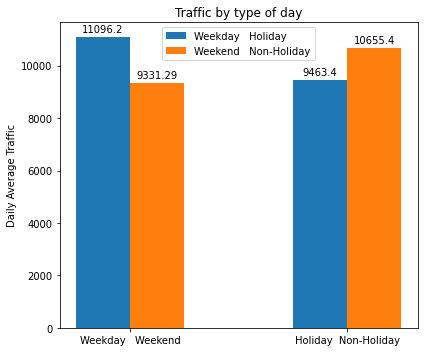

In [14]:
# Prepare axis data for chart
labels = ['Weekday   Weekend', 'Holiday  Non-Holiday']
week_means = [weekdayVal, holidayVal]       # pair weekday with holiday
holiday_means = [weekendVal, nonholidayVal] # pair weekend with non holiday
x = np.arange(len(labels))                  # the label locations
width = 0.25                                # the width of the bars

# Prepare the plot area
figDayType, axDayType = plt.subplots()
figDayType.set_size_inches(6,5)

# Create bar chart for the week & holiday data prepare above
rects1 = axDayType.bar(x - width/2, week_means, width, label='Weekday   Holiday')
rects2 = axDayType.bar(x + width/2, holiday_means, width, label='Weekend   Non-Holiday')

# Add labels, title and x-axis tick labels
axDayType.set_ylabel('Daily Average Traffic')
axDayType.set_title('Traffic by type of day')
axDayType.set_xticks(x)
axDayType.set_xticklabels(labels)
axDayType.legend()

# Label the bar charts with data
axDayType.bar_label(rects1, padding=3)
axDayType.bar_label(rects2, padding=3)

figDayType.tight_layout()   #Adjust the padding between and around subplots

plt.show()

From the above chart, weekdays have more traffic on average than weekends. Similarly, days with no holidays have more traffic on average than holidays.

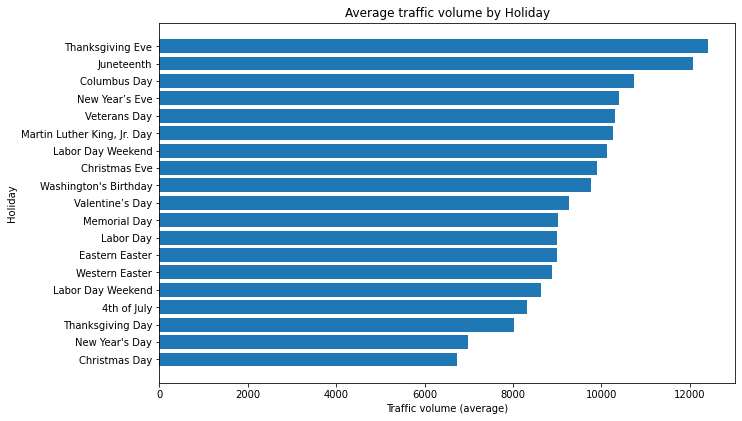

In [15]:
# Dig deeper to find out which holidays have the most or least traffic
# Sort the daily traffic dataframe by traffic
daily_traffic_avg_hol_name = daily_traffic_avg_hol[holidayIndex].sort_values('Daily Traffic')

# Prepare the plot area
figHoliday = plt.figure(1,figsize=(8, 5))
axHoliday = figHoliday.gca()
axHoliday = figHoliday.add_axes([0,0,1,1])

# Prepare axis data for chart, labels and ticks
y_pos = np.arange(len(daily_traffic_avg_hol_name['Holiday']))
axHoliday.barh(y_pos, daily_traffic_avg_hol_name['Daily Traffic'])
axHoliday.set_yticks(y_pos)
axHoliday.set_yticklabels(daily_traffic_avg_hol_name['Holiday'])
axHoliday.set_title("Average traffic volume by Holiday")
axHoliday.set_ylabel("Holiday")
axHoliday.set_xlabel("Traffic volume (average)")

plt.show()

From the above chart, Thanksgiving Eve has the highest movement of traffic followed closely by Juneteenth, whereas Christmas Day has the lowest.
It is interesting to note that people travel more on eves of holidays than the holidays itself (e.g. Thanksgiving, Christmas & New Year)

Seasonality of the traffic data
From the above exploration, there seems to be some seasonality to the data. Let's find out the seasonal trends from the data.

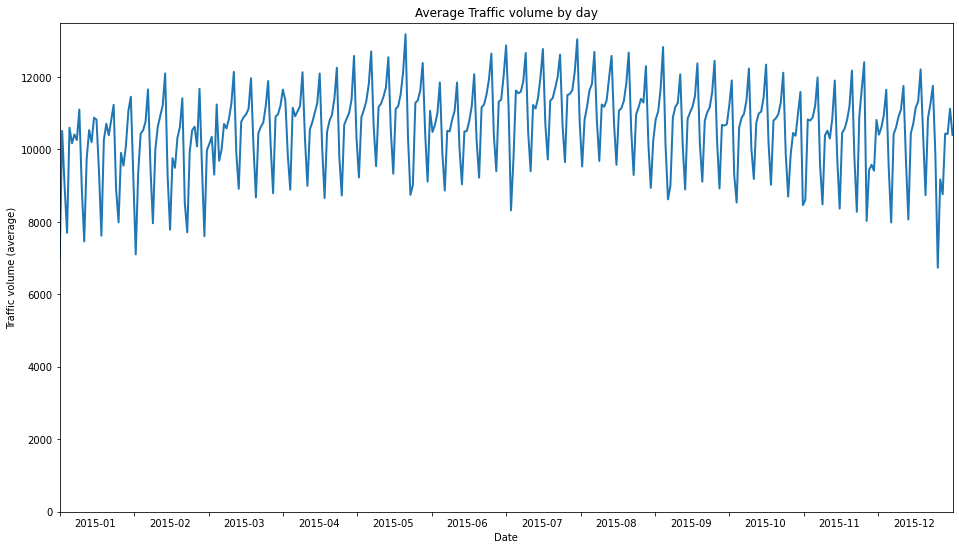

In [16]:
# Full data chart by day
# Create a daily traffic dataframe by adding the hourly traffic to one column 'Daily Traffic'
daily_traffic_avg.head()    # daily_traffic_avg was created in the US Holidays section above

# Prepare the plot area
figDaily = plt.figure(1,figsize=(16, 9))
axDaily = figDaily.gca()

# Prepare axis data for chart, labels and ticks
plt.title("Average Traffic volume by day")
plt.xlabel("Date")
plt.ylabel("Traffic volume (average)")
plt.plot(daily_traffic_avg, linewidth=2, aa=True)   # Plot a line chart
axpDaily = plt.gca()
start, end = axpDaily.get_xlim()    # get min & max ticks
# Change the tick frequency to monthly for clarity
axpDaily.xaxis.set_ticks(np.arange(0, end+start, (end+start)/12))
# Create a set of month (YYYY-MM) from the dates and set the ticks
axpDaily.axes.xaxis.set_ticklabels(sorted({x[:7] for x in daily_traffic_avg.index.to_list()}))
plt.xticks(ha='left')   # align labels to left

# Set the y axis to start from 0 to max of the data value
plt.xlim((0,end+start))
plt.ylim((0,axpDaily.get_ylim()[1]))

# Align the month labels in the middle of the ticks for each month
dx = 15/72.; dy = 0/72. 
offset = matplotlib.transforms.ScaledTranslation(dx, dy, figDaily.dpi_scale_trans)
for label in axpDaily.xaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)

plt.show()

The above chart does not show an upward rising trend but shows a regularly occurring spike in traffic. This pattern shows that we have seasonality in our time series. 
It also shows the spikes rising and falling in another trend. So, there may be a dual seasonality in this data. 
Also, since the magnitude of seasonality does not change in relation to time, Additive time series models can be used.
Since the source contains only one year data, finding the yearly, monthly and weekly seasonality is not possible as minimum 2 years of data is required.
Need further check on hourly and daily seasonality as we require minimum 2 days data for hourly and minimum 2 weeks data for daily seasonality, which is present in the data.


In [17]:
# Hourly Seasonality
# Filter the data for the date range: 7th to 13th of June i.e. 1 week of data
traffic_hourly = traffic[(traffic['day_of_data'] >= 7) & (traffic['day_of_data'] <= 13) & (traffic['month_of_data'] == 6)]

# Drop columns which are not required
traffic_hourly = traffic_hourly.drop(columns=['Daily Traffic', 'Avg Traffic', 'Weekly Traffic', 'Monthly Traffic', 'year_of_data', 'day_of_data'], axis = 1)
traffic_hourly = traffic_hourly.drop(columns=['station_id', 'fips_state_code', 'direction_of_travel_name', 'direction_of_travel', 'month_of_data', 'day_of_week'], axis = 1)

# Aggregate data by date
traffic_hourly = traffic_hourly.groupby("date").sum()

# Unpivot the hourly columns to rows
traffic_hourly.reset_index(inplace=True)
traffic_hourly = traffic_hourly.melt(id_vars='date', var_name='date_hour', value_name='Traffic')

# Change the date to datetime format using the hour string from the column names
traffic_hourly['date'] = traffic_hourly['date'] + ' ' + traffic_hourly['date_hour'].str[29:31]+':'+traffic_hourly['date_hour'].str[31:33]+':00'
traffic_hourly['date'] = pd.to_datetime(traffic_hourly['date'])
traffic_hourly.drop(columns=['date_hour'], axis = 1, inplace=True)

# Set the datetime column created previously as index
traffic_hourly = traffic_hourly.set_index('date', verify_integrity=True)

# Change the frequency of the index to Hourly ('h')
traffic_hourly = traffic_hourly.asfreq('h')
traffic_hourly

,Traffic
date,
2015-06-07 00:00:00,2966907
2015-06-07 01:00:00,1937540
2015-06-07 02:00:00,1457403
2015-06-07 03:00:00,1109152
2015-06-07 04:00:00,1142424
...,...
2015-06-13 19:00:00,9195063
2015-06-13 20:00:00,7991422
2015-06-13 21:00:00,7309626


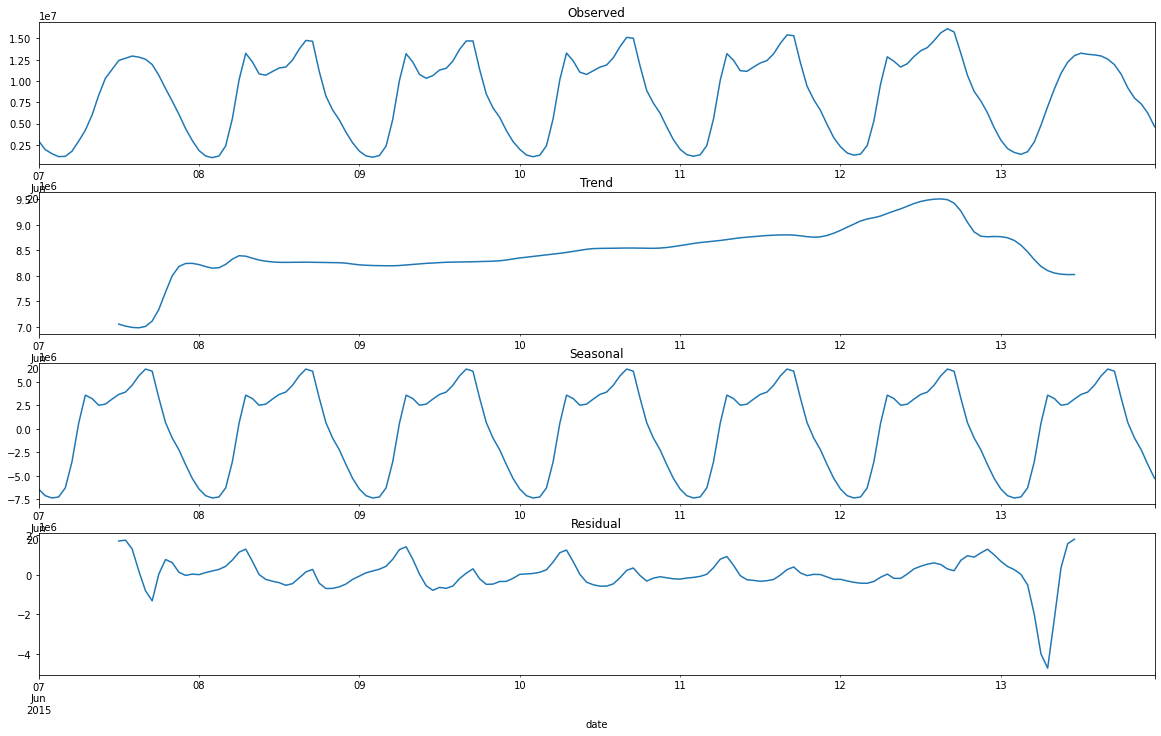

In [18]:
# Charts for seasonal decomposition using moving averages

# Seasonal decomposition using moving averages function returns an object with seasonal, trend, and residual attributes.
hourlySeasons = seasonal_decompose(traffic_hourly, model='additive')

# Separate the seasonal, trend and residual plots obtained above
fig, (ax0, ax1,ax2,ax3) = plt.subplots(4,1, figsize=(20,12))

# Label the plots
ax0.set_title("Observed")
ax1.set_title("Trend")
ax2.set_title("Seasonal")
ax3.set_title("Residual")

# Plot the individual plots
hourlySeasons.observed.plot(ax=ax0)
hourlySeasons.trend.plot(ax=ax1)
hourlySeasons.seasonal.plot(ax=ax2)
hourlySeasons.resid.plot(ax=ax3)

plt.show()

From the trend plot for the week, the trend is stable between 5 days (minimum 2 days required for seasonality). 7th & 13th June are weekends so the trend slopes downwards. 
Season varies with hours as we had seen previously in hourly average chart. 
Residual is somewhat stable with minor ups and downs around 0. 

In [19]:
# Daily Seasonality
# Filter the data for the date range: April & May i.e. 2 months of data
traffic_daily = traffic[(traffic['month_of_data'] >= 4) & (traffic['month_of_data'] <= 5)]

# Drop columns which are not required
traffic_daily = traffic_daily.drop(columns=['Daily Traffic', 'Avg Traffic', 'year_of_data', 'day_of_data'], axis = 1)
traffic_daily = traffic_daily.drop(columns=['station_id', 'fips_state_code', 'direction_of_travel_name', 'direction_of_travel', 'month_of_data', 'day_of_week'], axis = 1)

# Aggregate data by date
traffic_daily = traffic_daily.groupby("date").sum()

# Unpivot the hourly columns to rows
traffic_daily.reset_index(inplace=True)
traffic_daily = traffic_daily.melt(id_vars='date', var_name='date_hour', value_name='Traffic')
traffic_daily['date'] = pd.to_datetime(traffic_daily['date'])

# Aggregate data by date again as hourly columns are unpivot
traffic_daily = traffic_daily.groupby("date").sum()

# Change the frequency of the index to Daily ('d')
traffic_daily = traffic_daily.asfreq('d')
traffic_daily

,Traffic
date,
2015-04-01,680823390
2015-04-02,722160450
2015-04-03,700571454
2015-04-04,623266719
2015-04-05,543081873
...,...
2015-05-27,676363200
2015-05-28,693588654
2015-05-29,740580576


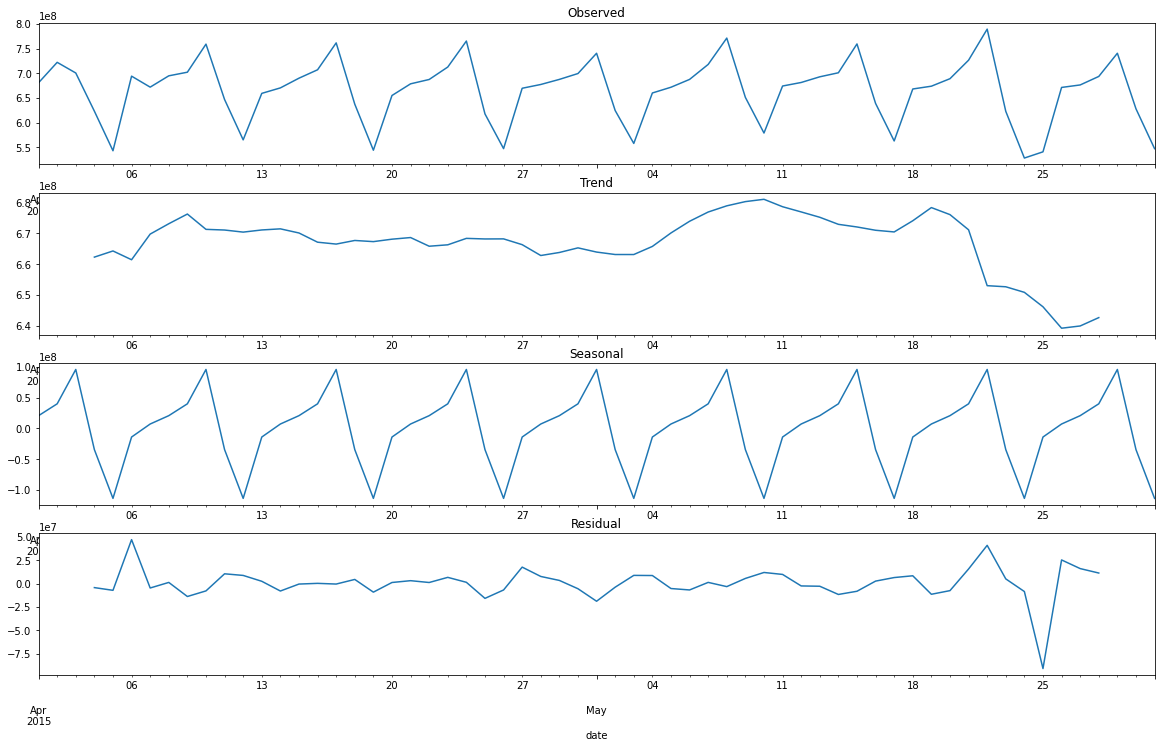

In [20]:
# Charts for seasonal decomposition using moving averages

# Seasonal decomposition using moving averages function returns an object with seasonal, trend, and residual attributes.
dailySeasons = seasonal_decompose(traffic_daily, model='additive')

# Separate the seasonal, trend and residual plots obtained above
fig, (ax0, ax1,ax2,ax3) = plt.subplots(4,1, figsize=(20,12))

# Label the plots
ax0.set_title("Observed")
ax1.set_title("Trend")
ax2.set_title("Seasonal")
ax3.set_title("Residual")

# Plot the individual plots
dailySeasons.observed.plot(ax=ax0)
dailySeasons.trend.plot(ax=ax1)
dailySeasons.seasonal.plot(ax=ax2)
dailySeasons.resid.plot(ax=ax3)

plt.show()

From the trend plot for the two months, the Trend is stable between the minimum 2 months required for seasonality. 25th May was holiday (Memorial Day), so the trend slopes downwards.
Seasonal varies with weekends & weekdays as we had seen previously in Weekly average chart. 
Residual (Error) is varying slightly. 

From the decomposition plot the necessary information to define the terms for the ETS model can be derived.
The trend line exhibits linear behavior so use an additive method.
The seasonality does not chang in magnitude each month so an additive method is necessary.
The error changes in magnitude as the series goes along so a multiplicative method will be used.
Checking the first model as error, trend, seasonal (ETS) exponential smoothing model, this leaves us with an ETS (M, A, A) model.

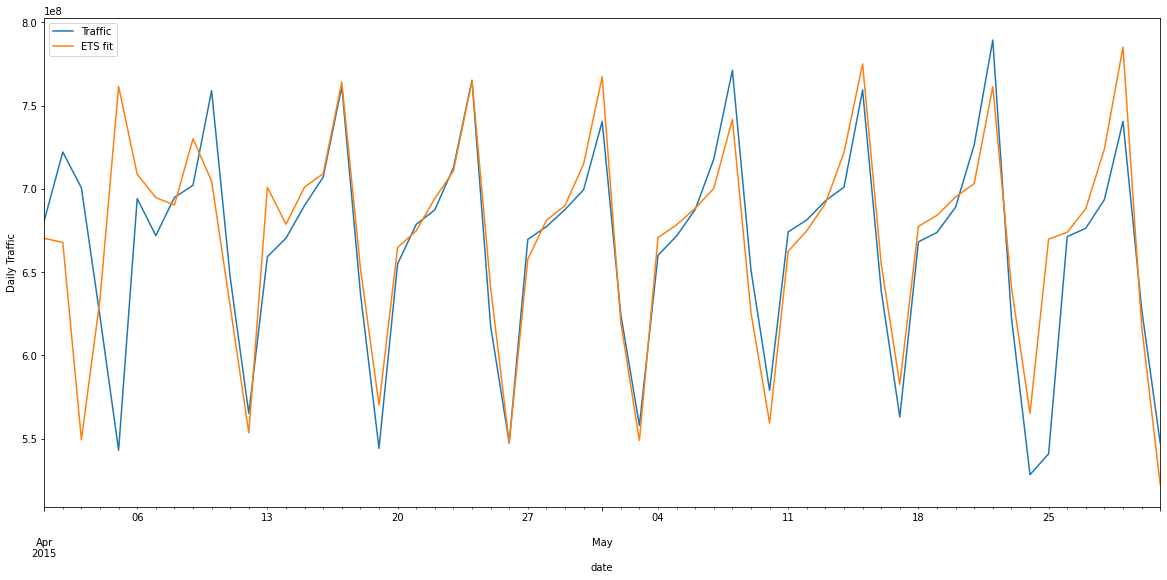

                                 ETS Results                                  
Dep. Variable:                Traffic   No. Observations:                   61
Model:                       ETS(MAA)   Log Likelihood               -1158.219
Date:                Sun, 12 Sep 2021   AIC                           2324.437
Time:                        18:34:19   BIC                           2332.881
Sample:                    04-01-2015   HQIC                          2327.746
                         - 05-31-2015   Scale                            0.004
Covariance Type:               approx                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
smoothing_level        0.0064      0.061      0.105      0.917      -0.114       0.127
smoothing_trend        0.0061      0.007      0.897      0.370      -0.007       0.019
smoothing_seasonal  

In [21]:
# use previously generated dataframe traffic_daily (April & May data) for ETS model

# Prepare the plot area
plt.rcParams["figure.figsize"] = (20, 9)

# Create a model based on Traffic values with ETS(MAA) model with weekly seasonal i.e. 7 days periods
modelETS = ETSModel(
    traffic_daily["Traffic"].astype("float64"),
    error="mul",
    trend="add",
    seasonal="add",
    seasonal_periods=7,
    initialization_method='heuristic'  
)
# Fit the model
fitETS = modelETS.fit()

# Label and plot the actual data and the fitted model
traffic_daily.plot(label="Actual Data")
fitETS.fittedvalues.plot(label="ETS fit")
plt.ylabel("Daily Traffic")
plt.legend()
plt.show()

# Display some statistics of the model
print(fitETS.summary())
print("MAE:", fitETS.mae)
print("MSE:", fitETS.mse)

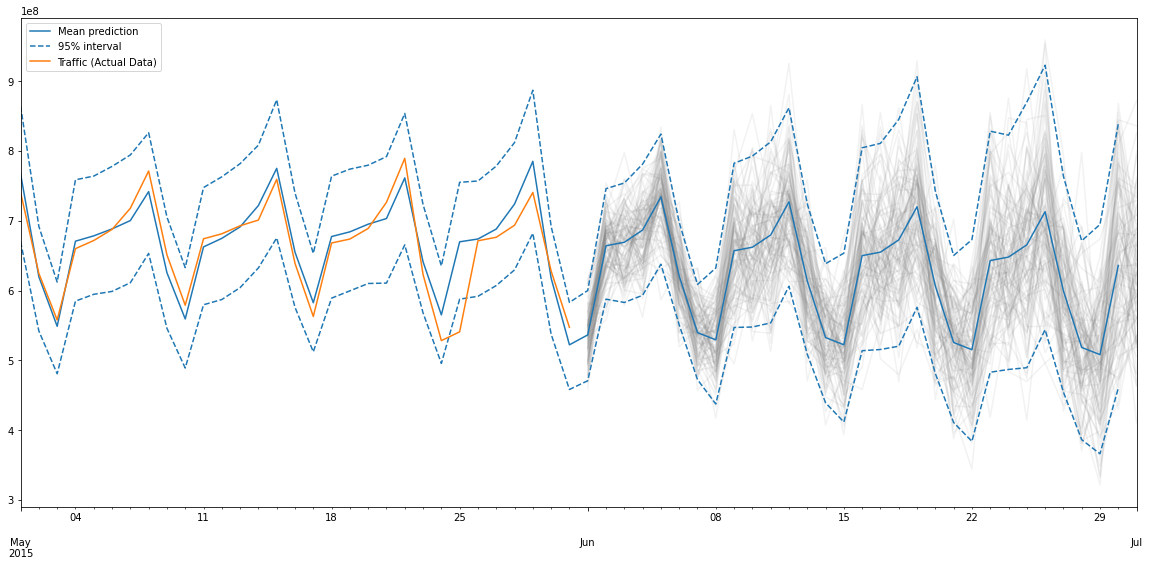

                    mean  mean_numerical      pi_lower      pi_upper
2015-05-01  7.673007e+08    7.657580e+08  6.700016e+08  8.642581e+08
2015-05-02  6.197574e+08    6.194498e+08  5.420668e+08  6.917961e+08
2015-05-03  5.488762e+08    5.477377e+08  4.808211e+08  6.122374e+08
2015-05-04  6.707653e+08    6.710828e+08  5.849020e+08  7.586789e+08
2015-05-05  6.783899e+08    6.779956e+08  5.946524e+08  7.640017e+08
...                  ...             ...           ...           ...
2015-06-26  7.130171e+08    7.174650e+08  5.440157e+08  9.228211e+08
2015-06-27  5.995972e+08    6.000692e+08  4.547077e+08  7.638239e+08
2015-06-28  5.185982e+08    5.212812e+08  3.863797e+08  6.712761e+08
2015-06-29  5.082363e+08    5.100127e+08  3.662319e+08  6.947194e+08
2015-06-30  6.359396e+08    6.379776e+08  4.602193e+08  8.387472e+08

[61 rows x 4 columns]


In [22]:
# Predict values for May & June
pred = fitETS.get_prediction(start="2015-05-01", end="2015-06-30")
dfPredictETS = pred.summary_frame(alpha=0.05)

# Prepare the plot area
figPredictETS = plt.figure(1,figsize=(20, 9))
axPredictETS = figPredictETS.gca()

# Create random simulations using the state space formulation and plot them
simulated = fitETS.simulate(anchor="end", nsimulations=31, repetitions=100)
for i in range(simulated.shape[1]):
    simulated.iloc[:, i].plot(label="_", color="gray", alpha=0.1)

# Plot the mean and 95% interval predictions (for May & June) along with the actual May data     
dfPredictETS["mean"].plot(label="Mean prediction")
dfPredictETS["pi_lower"].plot(linestyle="--", color="tab:blue", label="95% interval")
dfPredictETS["pi_upper"].plot(linestyle="--", color="tab:blue", label="_")
pred.endog.plot(label="Traffic (Actual Data)")

plt.legend()
plt.show()
print(dfPredictETS)

From the above graph for ETS model, the mean predicted values match very closely to the actual data in May and able to closely predict the values for June.

Next to find out which ARIMA model can be used and how it compares to ETS model's predictions.

In [23]:
# Filter the data for the date range: April to July i.e. 4 months of data
traffic_ARIMA = traffic[(traffic['month_of_data'] >= 5) & (traffic['month_of_data'] <= 7) & (traffic['direction_of_travel_name'] == "South") & (traffic["station_id"] == "0P0032")]

# Drop columns which are not required
traffic_ARIMA = traffic_ARIMA.drop(columns=['Daily Traffic', 'Avg Traffic', 'year_of_data', 'day_of_data'], axis = 1)
traffic_ARIMA = traffic_ARIMA.drop(columns=['station_id', 'fips_state_code', 'direction_of_travel_name', 'direction_of_travel', 'month_of_data', 'day_of_week'], axis = 1)

# Aggregate data by date
traffic_ARIMA = traffic_ARIMA.groupby("date").sum()

# Unpivot the hourly columns to rows
traffic_ARIMA.reset_index(inplace=True)
traffic_ARIMA = traffic_ARIMA.melt(id_vars='date', var_name='date_hour', value_name='Traffic')
traffic_ARIMA['date'] = pd.to_datetime(traffic_ARIMA['date'])

# Aggregate data by date again as hourly columns are unpivot
traffic_ARIMA = traffic_ARIMA.groupby("date").sum()

# Change the frequency of the index to Daily ('d')
traffic_ARIMA = traffic_ARIMA.asfreq('d')

acfInput = traffic_ARIMA["Traffic"].astype("float64")
print(traffic_ARIMA)

            Traffic
date               
2015-05-01   324189
2015-05-02   277821
2015-05-03   249498
2015-05-04   301296
2015-05-05   305715
...             ...
2015-07-27   298410
2015-07-28   305529
2015-07-29   293895
2015-07-30   308370
2015-07-31   326154

[92 rows x 1 columns]


ADF Statistic: -2.973690
p-value: 0.037426


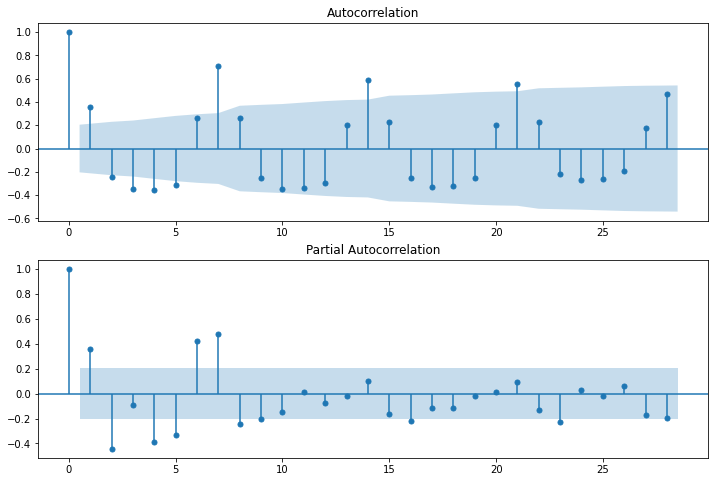

In [24]:
# First check the autocorrelation & partial autocorrelation function

# Prepare the plot area
plt.rcParams["figure.figsize"] = (20, 9)
fig = plt.figure(figsize=(12, 8))

# Plot the autocorrelation function with lags on the horizontal and the correlations on vertical axis
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(acfInput.values.squeeze(), ax=ax1, lags=28)

# Plot the partial autocorrelation function with lags on the horizontal and the correlations on vertical axis
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(acfInput.values.squeeze(), ax=ax2, lags=28)

# Check with ADF test if the time series is non-stationary
result = adfuller(traffic_ARIMA)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

Since the P-value (0.006985) is less than the significance level (0.05), so the time series is stationary. Hence, the order of differencing (d) in ARIMA model is 0.
The ACF presents slowly decaying serial correlations at the seasonal lags (0, 7, 14, 28).
The PACF presents exponentially decaying serial correlations at the seasonal lags (0, 7, 14, 28).
This indicates q > 1 and Q > 1 whereas p & P may be 0. This can be checked further using the auto-ARIMA process to identify the most optimal parameters for an ARIMA model.

Performing stepwise search to minimize aic
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=2100.042, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=2149.321, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=2581.831, Time=0.00 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=2126.817, Time=0.02 sec
 ARIMA(0,0,1)(0,0,2)[7] intercept   : AIC=2094.805, Time=0.09 sec
 ARIMA(0,0,1)(0,0,3)[7] intercept   : AIC=2092.311, Time=0.19 sec
 ARIMA(0,0,1)(0,0,4)[7] intercept   : AIC=2091.518, Time=0.35 sec
 ARIMA(0,0,0)(0,0,4)[7] intercept   : AIC=2111.428, Time=0.29 sec
 ARIMA(0,0,2)(0,0,4)[7] intercept   : AIC=2090.088, Time=0.43 sec
 ARIMA(0,0,2)(0,0,3)[7] intercept   : AIC=2091.680, Time=0.22 sec
 ARIMA(0,0,3)(0,0,4)[7] intercept   : AIC=2111.581, Time=0.53 sec
 ARIMA(0,0,2)(0,0,4)[7]             : AIC=2508.837, Time=0.56 sec

Best model:  ARIMA(0,0,2)(0,0,4)[7] intercept
Total fit time: 2.868 seconds
                                          SARIMAX Results                               

C:\Python39\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


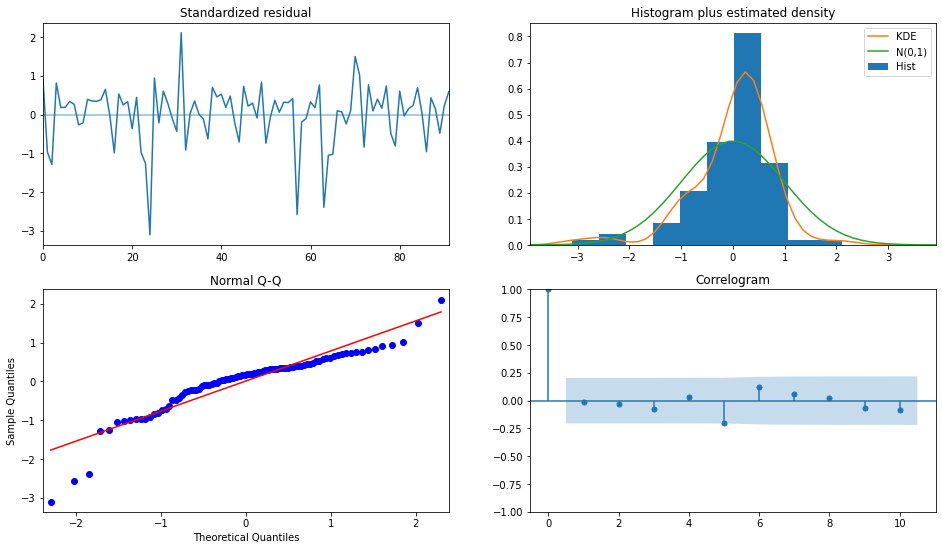

In [25]:
# The auto-ARIMA process seeks to identify the most optimal parameters for an ARIMA model, settling on a single fitted ARIMA model
modelaa = pm.auto_arima(acfInput, start_p=0, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=0, max_q=4, # maximum p and q
                      m=7,              # frequency of series i.e. 7 days
                      d=0,              # d=0 from adf test done above
                      seasonal=True,    # Seasonality is present
                      start_P=0, start_Q=1,
                      max_P=0, max_Q=4,
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(modelaa.summary())

modelaa.plot_diagnostics(figsize=(16,9))
plt.show()

The Auto ARIMA function has determined the Best model:  ARIMA(0,0,2)(0,0,4)[7] with AIC = 1887.944 
The standardized residual errors fluctuate around zero and have a somewhat uniform variance.
The histogram of density suggests normal distribution with mean around zero.
The theoretical quantity dots are very close to the red line. If there are any significant deviations then it would mean that the distribution is skewed.
The Correlogram plot shows the residual errors are not autocorrelated and hence most of the patterns in the residual errors are explained in the model.

Next, create a model based on this and predict & compare values.

C:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


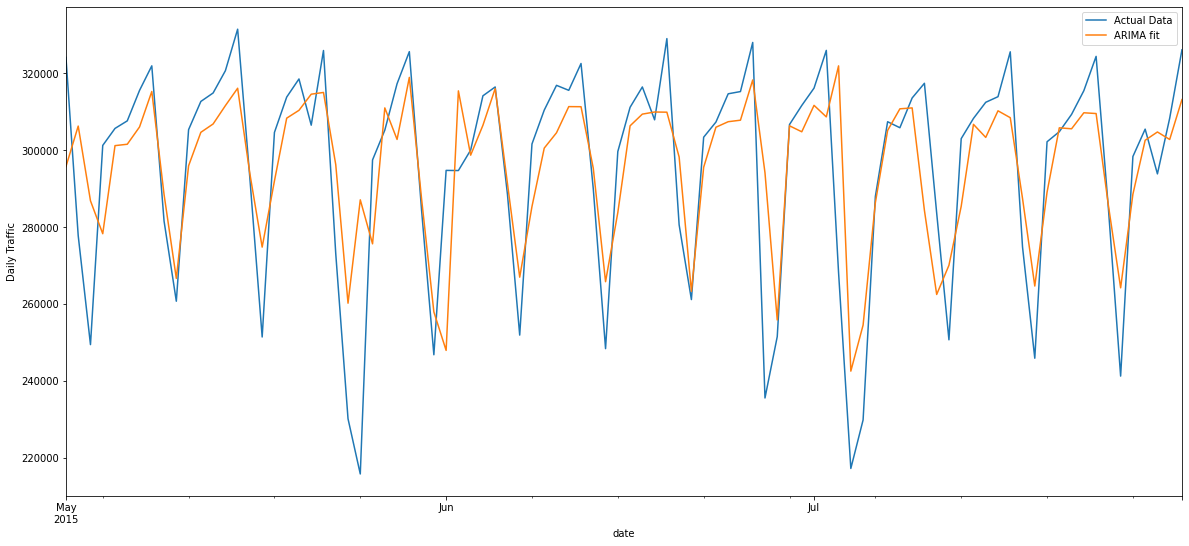

                                         SARIMAX Results                                          
Dep. Variable:                                    Traffic   No. Observations:                   92
Model:             ARIMA(0, 0, 2)x(0, 0, [1, 2, 3, 4], 7)   Log Likelihood               -1044.959
Date:                                    Sun, 12 Sep 2021   AIC                           2105.919
Time:                                            18:34:26   BIC                           2126.093
Sample:                                        05-01-2015   HQIC                          2114.061
                                             - 07-31-2015                                         
Covariance Type:                                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.958e+05   1.54e+04     19.169      0

In [26]:
# Create a model based on Traffic values with ARIMA(0,0,2)(0,0,4) model with weekly seasonal i.e. 7 days periods
modelARIMA002006 = sm.tsa.arima.ARIMA(acfInput, order=(0, 0, 2), seasonal_order=(0, 0, 4, 7))

# Prepare the plot area
plt.rcParams["figure.figsize"] = (20, 9)

# Fit the model
fitARIMA002006 = modelARIMA002006.fit()

# Label and plot the actual data and the fitted model
acfInput.plot(label="Actual Data")
fitARIMA002006.fittedvalues.plot(label="ARIMA fit")
plt.ylabel("Daily Traffic")

plt.legend()
plt.show()

# Display some statistics of the model
print(fitARIMA002006.summary())
print("MAE:", fitARIMA002006.mae)
print("MSE:", fitARIMA002006.mse)

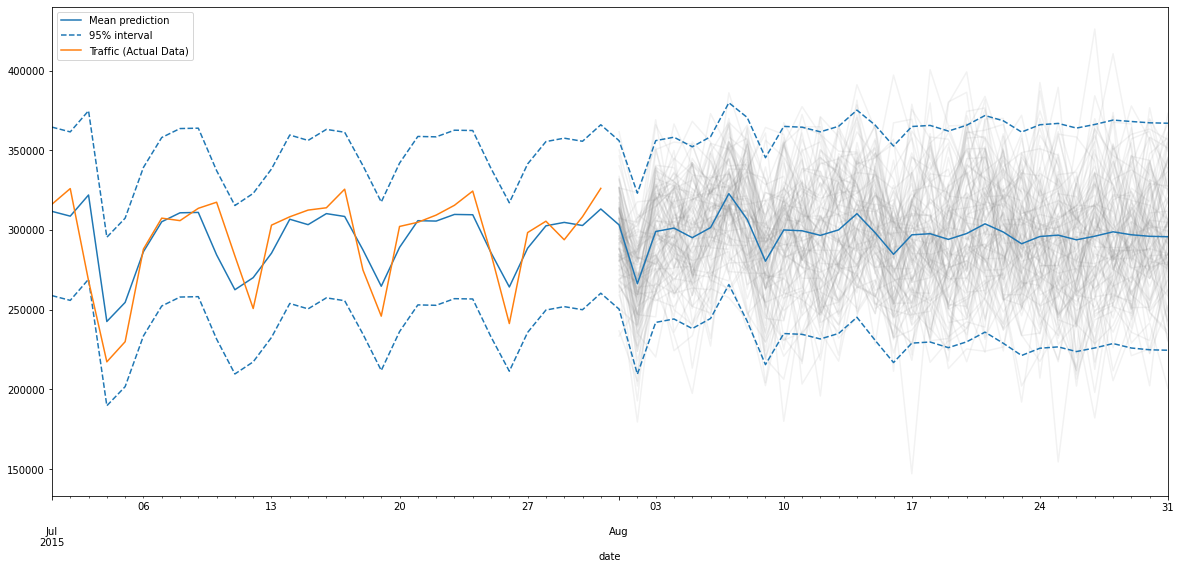

Traffic              mean       mean_se  mean_ci_lower  mean_ci_upper
2015-07-01  311713.123244  26975.392820  258842.324848  364583.921640
2015-07-02  308716.993297  26975.221983  255846.529734  361587.456859
2015-07-03  321984.522646  26974.248422  269115.967228  374853.078064
2015-07-04  242601.171308  26974.064831  189732.975722  295469.366893
2015-07-05  254573.693002  26974.059379  201705.508103  307441.877901
...                   ...           ...            ...            ...
2015-08-27  296125.776108  35776.356469  226005.405931  366246.146285
2015-08-28  298882.649290  35776.344640  228762.302297  369002.996284
2015-08-29  297029.414999  36262.809605  225955.614195  368103.215804
2015-08-30  296066.656847  36337.725411  224846.023761  367287.289933
2015-08-31  295793.184784  36342.191660  224563.798011  367022.571558

[62 rows x 4 columns]


In [27]:
# Predict values for July & August
predARIMA002006 = fitARIMA002006.get_prediction(start="2015-07-01", end="2015-08-31")
dfPredictARIMA = predARIMA002006.summary_frame(alpha=0.05)

# Prepare the plot area
figPredictARIMA = plt.figure(1,figsize=(20, 9))
axPredictARIMA = figPredictARIMA.gca()

# Create random simulations using the state space formulation and plot them
simulated = fitARIMA002006.simulate(anchor="end", nsimulations=31, repetitions=100)
for i in range(simulated.shape[1]):
    simulated.iloc[:, i].plot(label="_", color="gray", alpha=0.1)

# Plot the mean and 95% interval predictions (for July & August) along with the actual July data     
dfPredictARIMA["mean"].plot(label="Mean prediction")
dfPredictARIMA["mean_ci_lower"].plot(linestyle="--", color="tab:blue", label="95% interval")
dfPredictARIMA["mean_ci_upper"].plot(linestyle="--", color="tab:blue", label="_")
acfInput[((acfInput.index >= '2015-07-01') & (acfInput.index <= '2015-07-31'))].plot(label="Traffic (Actual Data)")

plt.legend()
plt.show()
print(dfPredictARIMA)

Model Comparison

ETS(M,A,A) Model
AIC: 2190.407
BIC: 2198.850
HQIC: 2193.716
MAE: 0.03479440602381025
MSE: 0.004062858783076796

ARIMA(0,0,2)(0,0,4)[7] Model
AIC: 1903.774
BIC: 1923.949
HQIC: 1911.917
MAE: 4359.21052149064
MSE: 36782687.198359035

Based on the predicted vs actual graphs, both models seems close to predict the actual values. 
If the AIC is considered for comparison, ARIMA model has a lower AIC value than ETS model, so we can choose ARIMA model for the predictions.